In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Leemos el .csv de la BD de Toronto
data = pd.read_csv('BD_Toronto_sin_nulos.csv', encoding='latin1')

In [6]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  int64  
 2   scrape_id                    26582 non-null  float64
 3   source                       26582 non-null  object 
 4   name                         26582 non-null  object 
 5   description                  26582 non-null  object 
 6   host_id                      26582 non-null  int64  
 7   host_name                    26582 non-null  object 
 8   host_since                   26582 non-null  object 
 9   host_location                26582 non-null  object 
 10  host_response_time           26582 non-null  object 
 11  host_response_rate           26582 non-null  float64
 12  host_acceptance_rate         26582 non-null  float64
 13  host_is_superhos

In [9]:
#Creamos 2 DataFrame para poder procesar los outliers 
cuantitativas = data.iloc[ : , [1, 2, 6, 11, 12, 14, 15, 19, 20, 23, 24, 26, 28, 29, 30, 23, 33, 34, 35, 36, 37, 38, 14, 42, 43, 44, 45, 46, 47, 50]]
cualitativas = data.iloc[ : , [3, 4, 5, 7, 8, 9, 10, 13, 16, 17, 18, 21, 22, 27, 31, 39, 40, 48, 49]]

Procedimiento "Cuantiles" para sustituir Outliers en el DataFrame

In [10]:
#Método aplicando Cuartiles, encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25 = y.quantile(0.25)   #Es el cuartil 1
percentiles75 = y.quantile(0.75)   #Es el cuartil 2
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido ", Limite_Superior_iqr)
print("Limite inferior permitido ", Limite_Inferior_iqr)

Limite superior permitido  id                             2.467577e+18
scrape_id                      2.024090e+13
host_id                        8.612864e+08
host_response_rate             1.096000e+02
host_acceptance_rate           1.165000e+00
host_listings_count            3.350000e+01
host_total_listings_count      3.950000e+01
latitude                       1.949409e+01
longitude                     -9.911773e+01
accommodates                   7.000000e+00
bathrooms                      3.500000e+00
beds                           3.500000e+00
price                          2.795125e+03
minimum_nights                 3.500000e+00
maximum_nights                 2.542500e+03
accommodates                   7.000000e+00
availability_60                1.130000e+02
availability_90                1.625000e+02
availability_365               7.105000e+02
number_of_reviews              1.355000e+02
number_of_reviews_ltm          5.250000e+01
number_of_reviews_l30d         5.000000e+00
host_

In [11]:
#Obtenemos datos limpios del DataFrame
data2_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_iqr

id     scrape_id    host_id  host_response_rate  \
0                    35797  2.024090e+13     153786                 NaN   
1                    44616  2.024090e+13     196253               100.0   
2                    67703  2.024090e+13     334451                 NaN   
3                    70644  2.024090e+13     212109               100.0   
4                   107078  2.024090e+13     540705               100.0   
...                    ...           ...        ...                 ...   
26577  1252141718111439700  2.024090e+13   67472234               100.0   
26578  1252159821531694005  2.024090e+13  596009321               100.0   
26579  1252185591721328995  2.024090e+13  596009321               100.0   
26580  1252218347521498445  2.024090e+13  596009321               100.0   
26581  1252229157495978163  2.024090e+13    6522855               100.0   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                      0.89                  1.0                        1.0   
1                      0.93                 12.0                       13.0   
2                       NaN                  3.0                        4.0   
3                      1.00                  3.0                        4.0   
4                      1.00                  5.0                        7.0   
...                     ...                  ...                        ...   
26577                  1.00                  NaN                        NaN   
26578                  1.00                 16.0                       16.0   
26579                  1.00                 16.0                       16.0   
26580                  1.00                 16.0                       16.0   
26581                  1.00                  4.0                        6.0   

        latitude  longitude  accommodates  ...  number_of_reviews_ltm  \
0      19.383820        NaN           2.0  ...                    0.0   
1      19.411620 -99.177940           NaN  ...                    0.0   
2      19.411520 -99.168570           4.0  ...                    4.0   
3      19.356140 -99.163080           2.0  ...                    7.0   
4      19.432110 -99.193270           2.0  ...                    0.0   
...          ...        ...           ...  ...                    ...   
26577  19.387329        NaN           4.0  ...                    0.0   
26578  19.432687 -99.197736           2.0  ...                    0.0   
26579  19.432687 -99.197736           2.0  ...                    0.0   
26580  19.432687 -99.197736           2.0  ...                    0.0   
26581  19.443476 -99.201748           2.0  ...                    0.0   

       number_of_reviews_l30d  host_listings_count  review_scores_accuracy  \
0                         0.0                  1.0                    4.56   
1                         0.0                 12.0                    4.56   
2                         0.0                  3.0                    4.81   
3                         2.0                  3.0                    4.90   
4                         0.0                  5.0                    5.00   
...                       ...                  ...                     ...   
26577                     0.0                  NaN                    5.00   
26578                     0.0                 16.0                    5.00   
26579                     0.0                 16.0                    5.00   
26580                     0.0                 16.0                    5.00   
26581                     0.0                  4.0                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
0                            NaN                   4.80   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...   

In [12]:
#Corroboramos valores nulos del DataFrame LIMPIO
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

id                                0
scrape_id                         0
host_id                           0
host_response_rate             2124
host_acceptance_rate           2846
host_listings_count            3567
host_total_listings_count      3764
latitude                       1779
longitude                      2845
accommodates                   1352
bathrooms                      3559
beds                           2447
price                          2083
minimum_nights                 3584
maximum_nights                    0
accommodates                   1352
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              2328
number_of_reviews_ltm          1318
number_of_reviews_l30d          813
host_listings_count            3567
review_scores_accuracy         1694
review_scores_cleanliness      5335
review_scores_checkin          1184
review_scores_communication    2085
review_scores_location      

In [13]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"

#Realizamos una copia del DataFrame
data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

id     scrape_id    host_id  host_response_rate  \
0                    35797  2.024090e+13     153786                98.4   
1                    44616  2.024090e+13     196253               100.0   
2                    67703  2.024090e+13     334451                98.4   
3                    70644  2.024090e+13     212109               100.0   
4                   107078  2.024090e+13     540705               100.0   
...                    ...           ...        ...                 ...   
26577  1252141718111439700  2.024090e+13   67472234               100.0   
26578  1252159821531694005  2.024090e+13  596009321               100.0   
26579  1252185591721328995  2.024090e+13  596009321               100.0   
26580  1252218347521498445  2.024090e+13  596009321               100.0   
26581  1252229157495978163  2.024090e+13    6522855               100.0   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                      0.89                  1.0                        1.0   
1                      0.93                 12.0                       13.0   
2                      1.00                  3.0                        4.0   
3                      1.00                  3.0                        4.0   
4                      1.00                  5.0                        7.0   
...                     ...                  ...                        ...   
26577                  1.00                  6.2                        7.3   
26578                  1.00                 16.0                       16.0   
26579                  1.00                 16.0                       16.0   
26580                  1.00                 16.0                       16.0   
26581                  1.00                  4.0                        6.0   

        latitude  longitude  accommodates  ...  number_of_reviews_ltm  \
0      19.383820 -99.200000           2.0  ...                    0.0   
1      19.411620 -99.177940           2.9  ...                    0.0   
2      19.411520 -99.168570           4.0  ...                    4.0   
3      19.356140 -99.163080           2.0  ...                    7.0   
4      19.432110 -99.193270           2.0  ...                    0.0   
...          ...        ...           ...  ...                    ...   
26577  19.387329 -99.200000           4.0  ...                    0.0   
26578  19.432687 -99.197736           2.0  ...                    0.0   
26579  19.432687 -99.197736           2.0  ...                    0.0   
26580  19.432687 -99.197736           2.0  ...                    0.0   
26581  19.443476 -99.201748           2.0  ...                    0.0   

       number_of_reviews_l30d  host_listings_count  review_scores_accuracy  \
0                         0.0                  1.0                    4.56   
1                         0.0                 12.0                    4.56   
2                         0.0                  3.0                    4.81   
3                         2.0                  3.0                    4.90   
4                         0.0                  5.0                    5.00   
...                       ...                  ...                     ...   
26577                     0.0                  6.2                    5.00   
26578                     0.0                 16.0                    5.00   
26579                     0.0                 16.0                    5.00   
26580                     0.0                 16.0                    5.00   
26581                     0.0                  4.0                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.80                   4.80   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...   

In [15]:
#Unimos el DataFrame cuantitativo limpio con el DataFrame cualitativo
Datos_limpios = pd.concat([cualitativas, data3_iqr], axis=1)
Datos_limpios

source                                              name  \
0          city scrape                                       Villa Dante   
1      previous scrape                                      Condesa Haus   
2          city scrape                 2 bedroom apt. deco bldg, Condesa   
3          city scrape  Beautiful light Studio Coyoacan- full equipped !   
4          city scrape                                NEW  DESIGNER LOFT   
...                ...                                               ...   
26577      city scrape    Charming 2-Bedroom Retreat in Lomas de Bezares   
26578      city scrape                     Suite King | District Polanco   
26579      city scrape                     Suite King | District Polanco   
26580      city scrape                    Suite Queen | District Polanco   
26581      city scrape                  Pretty, well centered, amenities   

                                             description   host_name  \
0      Dentro de Villa un estudio de arte con futon, ...        Dici   
1      A new concept of hosting in mexico through a b...    Fernando   
2      Comfortably furnished, sunny, 2 bedroom apt., ...    Nicholas   
3      COYOACAN designer studio quiet & safe! well eq...      Trisha   
4      Is the best ever place triple L <br />Location...      Andrea   
...                                                  ...         ...   
26577  Experience Mexico City in this delightful retr...     HostPal   
26578  This spacious room features a plush king-size ...  Luis Angel   
26579  Discover the essence of luxury in our king-siz...  Luis Angel   
26580  Welcome to your refuge in the heart of Polanco...  Luis Angel   
26581  Known as New Polanco, the Granada colony has p...    Salvador   

       host_since        host_location  host_response_time host_is_superhost  \
0      28/06/2010  Mexico City, Mexico  a few days or more                 f   
1      09/08/2010  Mexico City, Mexico      within an hour                 t   
2      04/01/2011  Mexico City, Mexico      within an hour                 t   
3      24/08/2010  Mexico City, Mexico  within a few hours                 t   
4      27/04/2011  Mexico City, Mexico      within an hour                 t   
...           ...                  ...                 ...               ...   
26577  16/04/2016  Mexico City, Mexico      within an hour                 t   
26578  13/08/2024  Mexico City, Mexico      within an hour                 f   
26579  13/08/2024  Mexico City, Mexico      within an hour                 f   
26580  13/08/2024  Mexico City, Mexico      within an hour                 f   
26581  22/05/2013  Mexico City, Mexico      within an hour                 t   

                     host_verifications host_identity_verified  ...  \
0      ['email', 'phone', 'work_email']                      t  ...   
1      ['email', 'phone', 'work_email']                      t  ...   
2                    ['email', 'phone']                      t  ...   
3      ['email', 'phone', 'work_email']                      t  ...   
4                    ['email', 'phone']                      t  ...   
...                                 ...                    ...  ...   
26577                ['email', 'phone']                      t  ...   
26578                ['email', 'phone']                      t  ...   
26579                ['email', 'phone']                      t  ...   
26580                ['email', 'phone']                      t  ...   
26581                ['email', 'phone']                      t  ...   

      number_of_reviews_ltm number_of_reviews_l30d host_listings_count  \
0                       0.0                    0.0                 1.0   
1                       0.0                    0.0                12.0   
2                       4.0                    0.0                 3.0   
3                       7.0                    2.0                 3.0   
4                       0.0                    0.0    

<Figure size 1500x800 with 0 Axes>

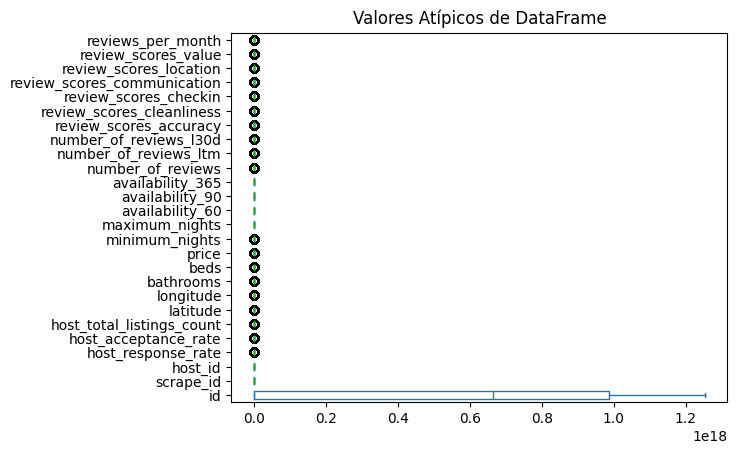

In [16]:
#Realizamos diagrama de caja o bigote de cada columna del DataFrame 
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("Valores Atípicos de DataFrame")
plt.show()   #Dibujamos el diagrama 

In [17]:
#Convertir DataFrame a .csv
Datos_limpios.to_csv("Datos_limpios_Toronto.csv")